## Data Collection and Preprocessing:

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msn


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.metrics import classification_report
import joblib

In [ ]:
# Loading Data

train_df = pd.read_csv('Flight_Train.csv')
train_df.set_index('ID', inplace=True)
test_df = pd.read_csv('Flight_Test.csv')
test_df.set_index('ID', inplace=True)

### Preview the dataset

In [ ]:
train_df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [ ]:
#checking the last few rows
train_df.tail()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0
train_id_107832,2018-11-13,UG 0002,TUN,DJE,2018-11-13 06:15:00,2018-11-13 07.05.00,SCH,TU CR9ISA,0.0


In [ ]:
test_df.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ


In [ ]:
test_df.tail()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
ID,,,,,,,,
test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD
test_id_9332,2018-09-19,UG 0009,DJE,TUN,2018-09-19 16:15:00,2018-09-19 17.15.00,SCH,UG AT7LBD


##EDA

In [ ]:
train_df.dtypes

DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        object
STA        object
STATUS     object
AC         object
target    float64
dtype: object

### View summary of dataset

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DATOP   107833 non-null  object 
 1   FLTID   107833 non-null  object 
 2   DEPSTN  107833 non-null  object 
 3   ARRSTN  107833 non-null  object 
 4   STD     107833 non-null  object 
 5   STA     107833 non-null  object 
 6   STATUS  107833 non-null  object 
 7   AC      107833 non-null  object 
 8   target  107833 non-null  float64
dtypes: float64(1), object(8)
memory usage: 8.2+ MB


In [ ]:
train_df.shape


(107833, 9)

### Check for missing values in dataset

<Axes: >

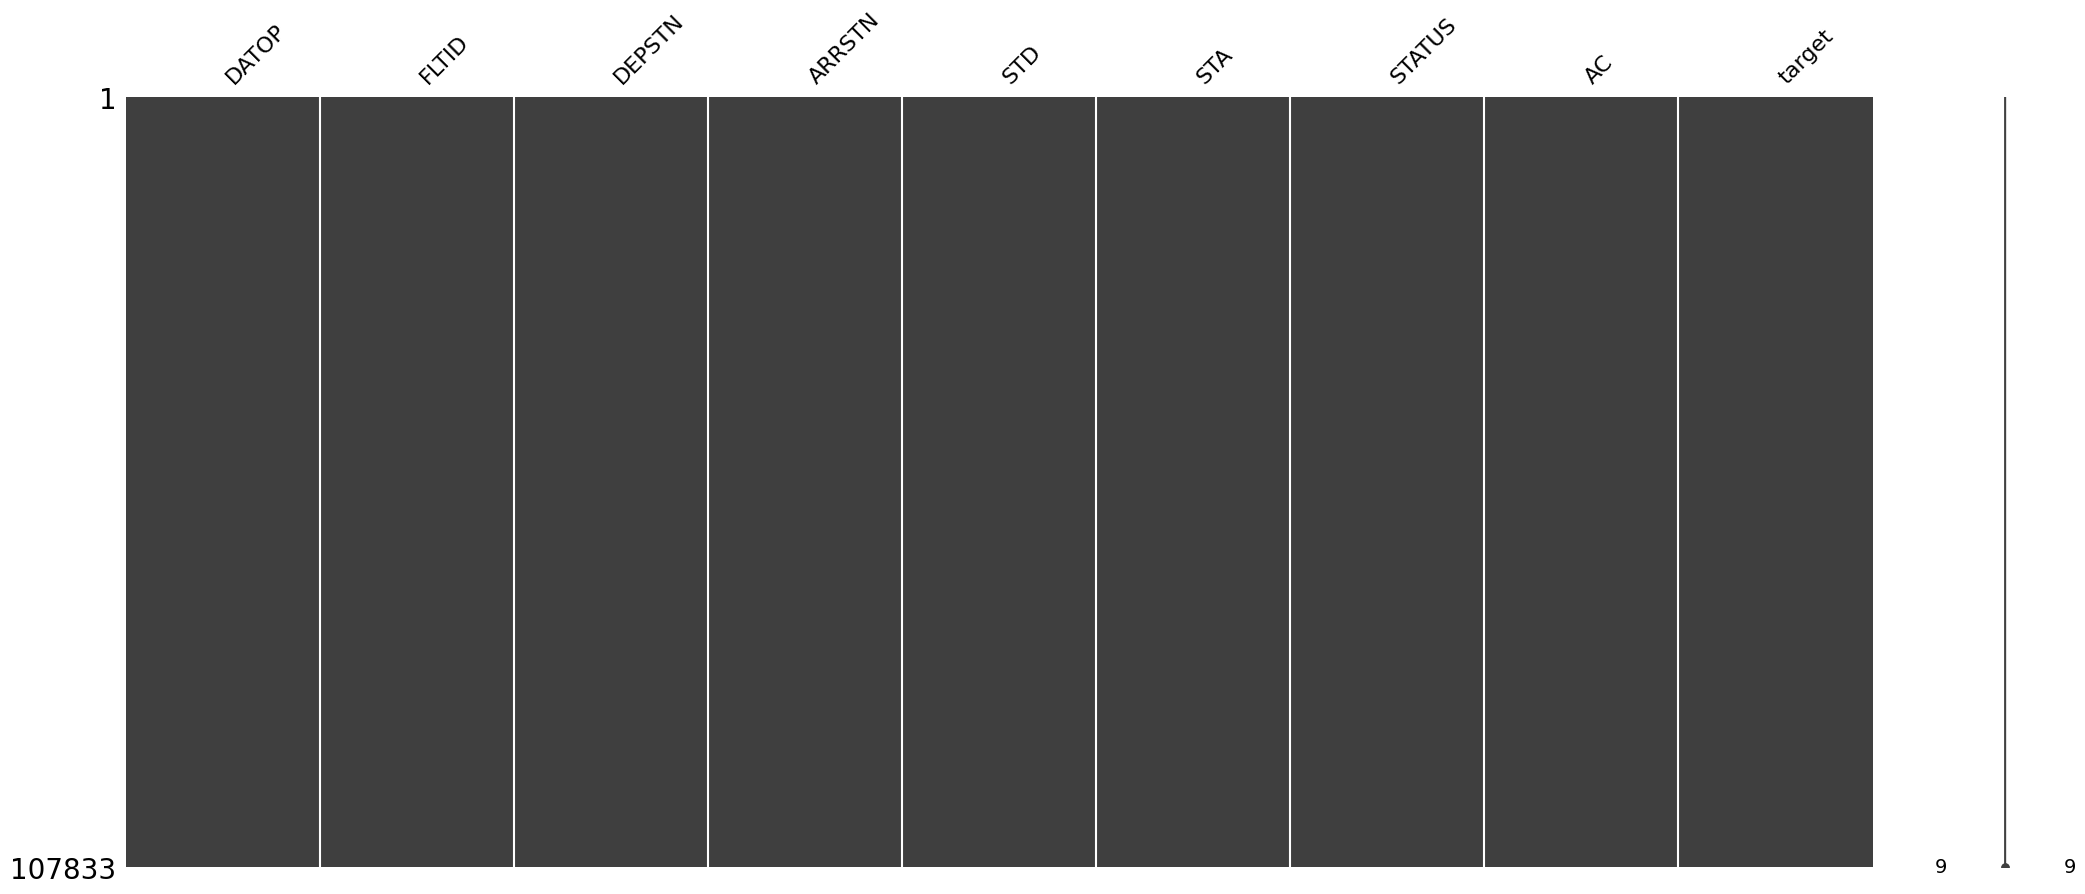

In [ ]:
#visualizing missing data
msn.matrix(train_df)

In [ ]:
train_df.isnull().sum()


DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [ ]:
#Duplicated values
data_dup = train_df.duplicated().any()
data_dup

False


We can see that, there are 8 character variables (data type = object) and 1 numerical variables (data type = float64).


### View the statistical summary of numerical variables

In [ ]:
train_df.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


There are 8 categorical variables in the dataset. exploring them one by one. 
To iddentify those approximately to unique identifiers (that is 107833)
So we can decide if they are dropped or not.

### Explore `DATOP` variable

In [ ]:
# view the labels in the variable

train_df['DATOP'].unique()

array(['2016-01-03', '2016-01-13', '2016-01-16', ..., '2018-12-28',
       '2018-12-29', '2018-12-30'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['DATOP'].unique())

1011

We can see that there are 1011 categories of labels in the ` DATOP` variable.

### Explore `FLTID` variable

In [ ]:
# view the unique values in the column status_published

train_df['FLTID'].unique()

array(['TU 0712 ', 'TU 0757 ', 'TU 0214 ', ..., 'UG 1020 ', 'UG 1501 ',
       'UG 1004 '], dtype=object)

In [ ]:
# view how many different types of values are there

len(train_df['FLTID'].unique())

1861

We can see that there are 1861 categories of labels in the ` FLTID` variable.

### Explore `DEPSTN` variable

In [ ]:
# view the labels in the variable

train_df ['DEPSTN'].unique()

array(['CMN', 'MXP', 'TUN', 'DJE', 'TLS', 'IST', 'ORY', 'MIR', 'BRU',
       'ABJ', 'VCE', 'AMS', 'FRA', 'BCN', 'JED', 'ALG', 'LIS', 'SXB',
       'LYS', 'OUA', 'LGW', 'BEY', 'NCE', 'OPO', 'MRS', 'DUS', 'SFA',
       'FCO', 'CDG', 'NKC', 'NTE', 'ZRH', 'GVA', 'OUD', 'MUC', 'SXF',
       'HAM', 'NDR', 'NBE', 'CAI', 'BEG', 'VIE', 'ORN', 'MAD', 'TOE',
       'BKO', 'DKR', 'KGL', 'BLQ', 'MLA', 'AHU', 'LHR', 'BOD', 'PRG',
       'LJU', 'SVO', 'MED', 'BUD', 'ARN', 'CPH', 'CRL', 'OST', 'TNG',
       'GAF', 'NAP', 'BRQ', 'OSR', 'YUL', 'NIM', 'TMR', 'JIB', 'CGN',
       'EBL', 'GAE', 'BJA', 'AYT', 'RAK', 'LFW', 'LIL', 'PMO', 'FBM',
       'TBJ', 'PSA', 'KRT', 'GNB', 'CZL', 'MVB', 'VNO', 'ESB', 'LBV',
       'CKY', 'LED', 'KSC', 'BTS', 'AMM', 'OTP', 'TRN', 'IEV', 'HBE',
       'CAG', 'KBP', 'ATH', 'SKG', 'ADB', 'DSS', 'DOH', 'COO', 'LUX',
       'FIH', 'BYJ', 'KEF', 'EBM', 'BDS', 'AAL', 'VKO', 'AAE', 'BRI',
       'VRN', 'SKX', 'HAJ', 'BLL', 'TLL', 'VOG', 'LAD', 'GHA', 'KTW',
       'SJJ', 'KRR',

In [ ]:
# view how many different types of variables are there

len(train_df['DEPSTN'].unique())

132

We can see that there are 132 categories of labels in the ` DEPSIN` variable.

### Explore ` ARRSTN ` variable

In [ ]:
# view the labels in the variable

train_df ['ARRSTN'].unique()

array(['TUN', 'IST', 'NTE', 'ALG', 'BCN', 'ORY', 'FCO', 'NCE', 'MRS',
       'MED', 'FRA', 'BRU', 'DJE', 'LYS', 'CMN', 'BEG', 'OUA', 'GVA',
       'MXP', 'BEY', 'MAD', 'JED', 'ABJ', 'VIE', 'MLA', 'BLQ', 'SFA',
       'LIS', 'LHR', 'CDG', 'MIR', 'CAI', 'DUS', 'HAM', 'NBE', 'ZRH',
       'AMS', 'NDR', 'TLS', 'VCE', 'SXB', 'MUC', 'LGW', 'CRL', 'ORN',
       'DKR', 'BOD', 'SXF', 'LJU', 'OST', 'NKC', 'BKO', 'TOE', 'AHU',
       'YUL', 'PRG', 'CPH', 'ARN', 'OUD', 'BRQ', 'GAF', 'JIB', 'BUD',
       'OPO', 'KGL', 'NIM', 'SVO', 'LIL', 'OSR', 'EBL', 'TNG', 'PSA',
       'CGN', 'AYT', 'GAE', 'NAP', 'BJA', 'KRT', 'LFW', 'TBJ', 'PMO',
       'TMR', 'FBM', 'RAK', 'GNB', 'ESB', 'CZL', 'LBV', 'KSC', 'CKY',
       'AMM', 'LED', 'BTS', 'MVB', 'HBE', 'OTP', 'CAG', 'VNO', 'TRN',
       'ATH', 'ADB', 'SKG', 'BYJ', 'DSS', 'COO', 'IEV', 'LUX', 'KBP',
       'DOH', 'FIH', 'EBM', 'BDS', 'VKO', 'AAE', 'BLL', 'HAJ', 'BRI',
       'CTA', 'VRN', 'SKX', 'VOG', 'BGY', 'LAD', 'KRR', 'SJJ', 'GHA',
       'RTM', 'TPS']

In [ ]:
# view how many different types of variables are there

len(train_df['ARRSTN'].unique())

128

We can see that there are 128 categories of labels in the ` ARRSTN` variable.

### Explore `  STD ` variable

In [ ]:
# view the labels in the variable

train_df ['STD'].unique()

array(['2016-01-03 10:30:00', '2016-01-13 15:05:00',
       '2016-01-16 04:10:00', ..., '2018-11-07 05:00:00',
       '2018-01-23 18:00:00', '2018-11-13 06:15:00'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STD'].unique())

81697

We can see that there are 81697 categories of labels in the ` STD ` variable.

### Explore ` STA ` variable

In [ ]:
# view the labels in the variable

train_df ['STA'].unique()

array(['2016-01-03 12.55.00', '2016-01-13 16.55.00',
       '2016-01-16 06.45.00', ..., '2018-12-20 01.45.00',
       '2018-01-23 18.45.00', '2018-11-13 07.05.00'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STA'].unique())

85136

We can see that there are 85136 categories of labels in the ` STA ` variable.

### Explore ` STATUS ` variable

In [ ]:
# view the labels in the variable

train_df ['STATUS'].unique()

array(['ATA', 'DEP', 'RTR', 'SCH', 'DEL'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['STATUS'].unique())

5

We can see that there are 5 categories of labels in the ` STATUS ` variable.

### Explore `  AC ` variable

In [ ]:
# view the labels in the variable

train_df ['AC'].unique()

array(['TU 32AIMN', 'TU 31BIMO', 'TU 736IOK', 'TU 320IMU', 'TU 736IOP',
       'TU 32AIMH', 'TU 32AIMI', 'TU 32AIMC', 'TU 31AIMK', 'TU 32AIMF',
       'TU 32AIMP', 'TU 320IMR', 'TU 332IFN', 'TU 31AIMJ', 'TU 320IMT',
       'TU 736IOL', 'TU 31BIMQ', 'TU 736IOR', 'TU 320IMV', 'TU 320IMS',
       'TU 332IFM', 'TU 320IMW', 'TU 32AIML', 'TU 32AIMD', 'TU 32AIMM',
       'TU CR9ISA', 'TU 32AIMG', 'TU 736ION', 'TU 736IOM', 'TU 736IOQ',
       '5M 343SUN', 'UG AT7LBD', '5K 343TQY', 'UG AT7LBE', 'UG AT7AT7',
       'BJ 320INP', 'BJ 320INH', 'BJ 320INQ', 'BJ 320INA', 'UG CR9XXX',
       'UG CR9CR9', 'TU 32A32A', 'BJ 320INB', 'GJ 734CGC', 'QS 738TSC',
       'PS 738PSD', 'D4 319CQG', 'BJ 320INR', 'BJ 320INC', 'UJ 320TCF',
       '5K 345TFX', 'D4 320CQP', '5M 343JAI', 'GW 320MQH', 'UG CR9ISA',
       '6P M87TRJ', 'TU CR9CR9', 'TU CR9XXX', 'GJ 733EWE', 'GJ 734PGC',
       'GJ 733GGC', 'GJ 734MGC', 'GJ 733LGC', '5M 343FOX', 'BJ 320INO',
       'OL 321ABY', 'X9 320VEB', 'TU 320320'], dtype=object)

In [ ]:
# view how many different types of variables are there

len(train_df['AC'].unique())

68

We can see that there are 68 categories of labels in the ` STATUS ` variable.

## Feature Engineering:

### **Declare feature vector and target variable** <a class="anchor" id="9"></a>

In [ ]:
X = train_df

y = train_df['target']

In [ ]:
y.shape

(107833,)

In [ ]:
print(X.columns)

Index(['DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS', 'AC',
       'target'],
      dtype='object')


### **Convert categorical variable into integers** <a class="anchor" id="10"></a>

The Categorical Variables within the dataset are:
'DEPSTN', 'ARRSTN','STATUS', 'AC',

In [ ]:
# Initialize LabelEncoder
le = LabelEncoder()

# Label encode each categorical variable
X['DEPSTN'] = le.fit_transform(X['DEPSTN'])
X['ARRSTN'] = le.fit_transform(X['ARRSTN'])
X['STATUS'] = le.fit_transform(X['STATUS'])
X['AC'] = le.fit_transform(X['AC'])

### Converting 'DATOP' to datetime format

In [ ]:
X['DATOP'] = pd.to_datetime(X['DATOP'])


In [ ]:
X['STA'] = pd.to_datetime(X['STA'], format='%Y-%m-%d %H.%M.%S')


In [ ]:
X['STD'] = pd.to_datetime(X['STD'])

### Dropping selected variables here 
### Not important features for predicting flight delays


### Dropping `FLTID ` variable from the dataset

In [ ]:
train_df.drop(['FLTID'], axis=1, inplace=True)

### View the summary of X

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107833 entries, train_id_0 to train_id_107832
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   DATOP   107833 non-null  datetime64[ns]
 1   FLTID   107833 non-null  object        
 2   DEPSTN  107833 non-null  int32         
 3   ARRSTN  107833 non-null  int32         
 4   STD     107833 non-null  datetime64[ns]
 5   STA     107833 non-null  datetime64[ns]
 6   STATUS  107833 non-null  int32         
 7   AC      107833 non-null  int32         
 8   target  107833 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int32(4), object(1)
memory usage: 10.6+ MB


### Preview the dataset X

In [ ]:
X.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
ID,,,,,,,,,
train_id_0,2016-01-03,TU 0712,31,119,2016-01-03 10:30:00,2016-01-03 12:55:00,0,46,260.0
train_id_1,2016-01-13,TU 0757,86,119,2016-01-13 15:05:00,2016-01-13 16:55:00,0,28,20.0
train_id_2,2016-01-16,TU 0214,123,58,2016-01-16 04:10:00,2016-01-16 06:45:00,0,46,0.0
train_id_3,2016-01-17,TU 0480,37,91,2016-01-17 14:10:00,2016-01-17 17:00:00,0,50,0.0
train_id_4,2016-01-17,TU 0338,123,4,2016-01-17 14:30:00,2016-01-17 15:50:00,0,34,22.0


### Performing correlation analysis:
TO identify important features for predicting flight delays


Calculate the correlation coefficients between features and the target variable (flight delay duration) using the corr() function:

In [ ]:
correlation_matrix = train_df.corr()

Visualize the correlation matrix:
Plot the correlation matrix using Matplotlib:

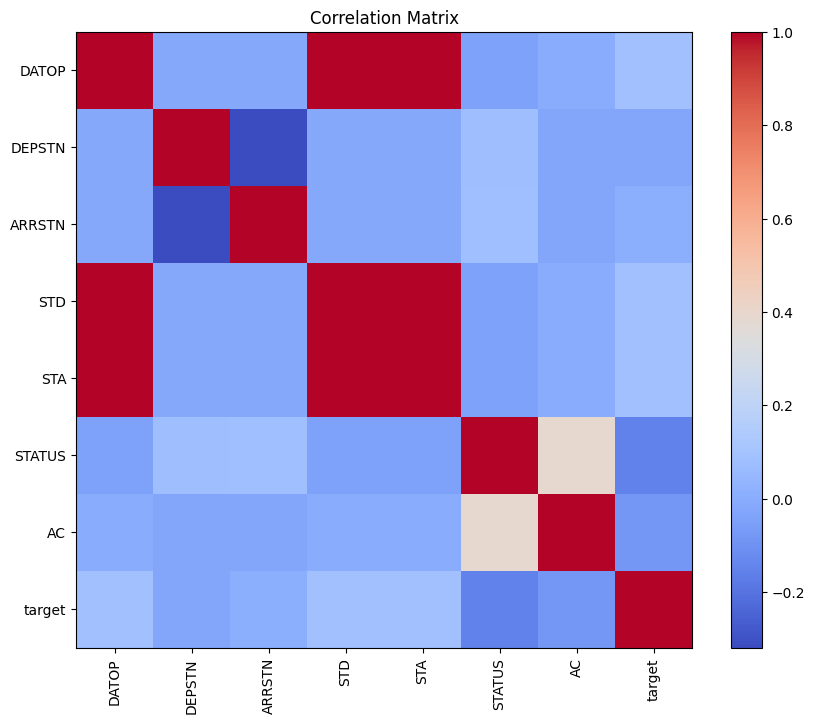

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()


DATOP has got a strong correlaion with STD and STD
Therefore seems important for future delay prediction
hence column shouldn't be deleted.


Looking at AC correlation with target.
Can column be dropped.

### Feature Scaling <a class="anchor" id="11"></a>

In [ ]:
cols = X.columns